In [1]:
%matplotlib inline
# %matplotlib qt5

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import datetime
import json
import requests
from scipy.stats import linregress

In [3]:
rides_df = pd.read_csv("VFH_edited.csv")
rides_df["MYDATE"] = pd.to_datetime(rides_df["MYDATE"])
rides_df.head()

,COMPANY_ID,PICKUP_TIME,TRIP_MILES,TRIP_TIME,P_TIP,DOW,PICKUP_DAY,MYDATE,TOTAL,TIP%,Borough,precip,TEMP_F,HOLIDAY,WEATHER
0,HV0005,1/18/2021 0:37,1.690,487,0.0,0,Mon,2021-01-18,13.45,0.0,Manhattan,0.0,41.18,1,Good
1,HV0005,1/23/2021 15:17,2.865,854,0.0,5,Sat,2021-01-23,15.41,0.0,Manhattan,0.0,30.20,0,Good
2,HV0003,1/28/2021 5:59,1.490,370,0.0,3,Thurs,2021-01-28,7.79,0.0,Brooklyn,0.0,28.76,0,Good
3,HV0003,1/5/2021 19:24,5.550,942,0.0,1,Tues,2021-01-05,24.66,0.0,Brooklyn,0.0,38.84,0,Good
4,HV0005,1/24/2021 0:24,1.077,455,0.0,6,Sun,2021-01-24,10.35,0.0,Brooklyn,0.0,27.32,0,Good


r-value: 0.2184750611844878


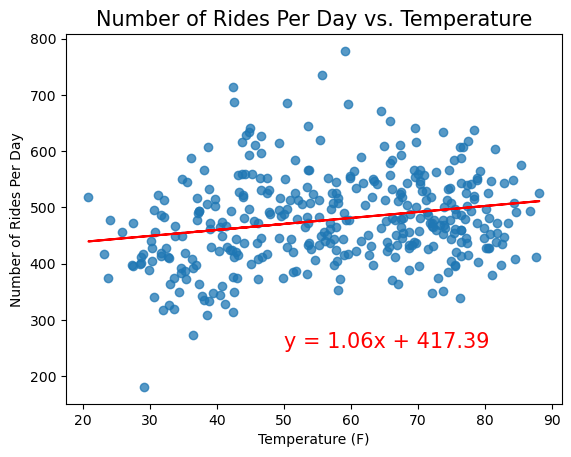

<Figure size 400x350 with 0 Axes>

In [25]:
# Ride Count Per Day vs. Temp
daily_temp = rides_df.groupby(["MYDATE"])["TEMP_F"].unique()
ride_count = rides_df.groupby(["MYDATE"])["PICKUP_DAY"].count()
x_values = daily_temp.astype(float)
y_values = ride_count.astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values, alpha=0.75)
plt.plot(x_values,regress_values, "r-")
plt.annotate(line_eq, (50, 250), fontsize=15, color="red")
plt.xlabel("Temperature (F)")
plt.ylabel("Number of Rides Per Day")
plt.title("Number of Rides Per Day vs. Temperature", fontsize=15)
print(f"r-value: {rvalue}")
plt.figure(figsize=(4, 3.5))
plt.show()

r-value: -0.06041299690985074


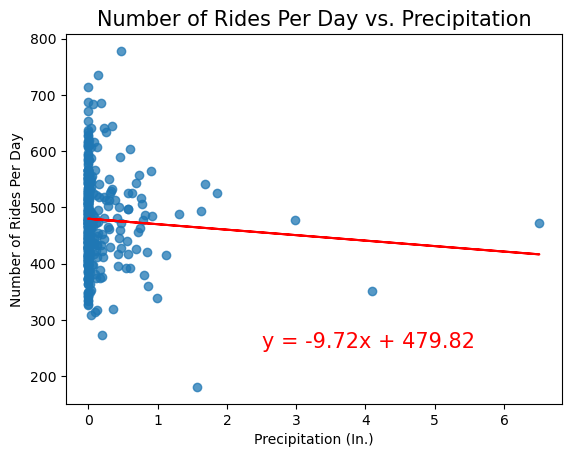

<Figure size 400x350 with 0 Axes>

In [24]:
# Ride Count Per Day vs. Precip
daily_precip = rides_df.groupby(["MYDATE"])["precip"].unique()
ride_count = rides_df.groupby(["MYDATE"])["PICKUP_DAY"].count()
precip_inches = daily_precip / 25.4
x_values = precip_inches.astype(float)
y_values = ride_count.astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values, alpha=0.75)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq, (2.5, 250), fontsize=15, color="red")
plt.xlabel("Precipitation (In.)")
plt.ylabel("Number of Rides Per Day")
plt.title("Number of Rides Per Day vs. Precipitation", fontsize=15)
print(f"r-value: {rvalue}")
plt.figure(figsize=(4, 3.5))
plt.show()

r-value: 0.6254556659091998


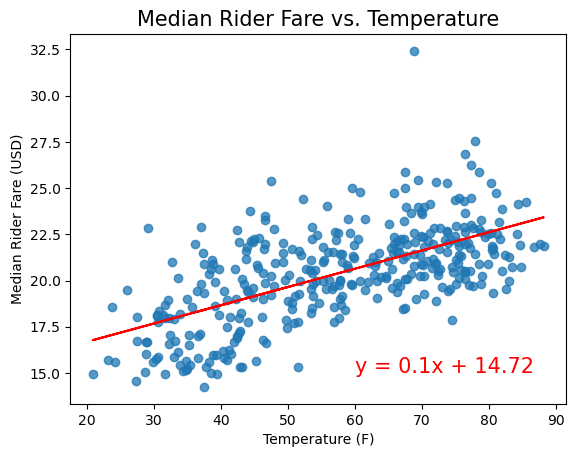

<Figure size 400x350 with 0 Axes>

In [23]:
# Median Rider Fare vs. Temp (grouped by day)
daily_temp = rides_df.groupby(["MYDATE"])["TEMP_F"].unique()
med_fares = rides_df.groupby(["MYDATE"])["TOTAL"].median()
x_values = daily_temp.astype(float)
y_values = med_fares.astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values, alpha=0.75)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq, (60, 15) ,fontsize=15,color="red")
plt.xlabel("Temperature (F)")
plt.ylabel("Median Rider Fare (USD)")
plt.title("Median Rider Fare vs. Temperature", fontsize=15)
print(f"r-value: {rvalue}")
plt.figure(figsize=(4, 3.5))
plt.show()

r-value: 0.17042033527162606


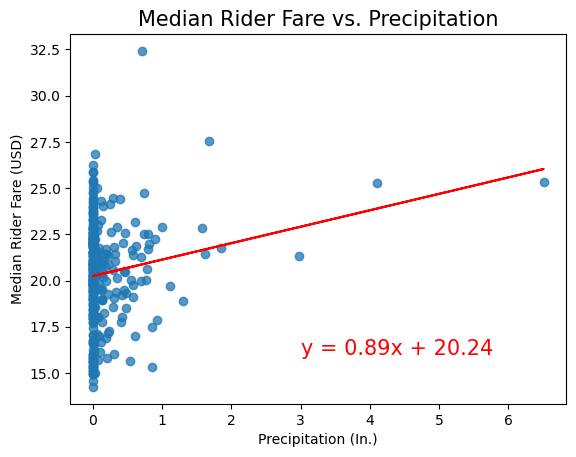

<Figure size 400x350 with 0 Axes>

In [22]:
# Median Rider Fare vs. Precip (grouped by day)
daily_precip = rides_df.groupby(["MYDATE"])["precip"].unique()
med_fares = rides_df.groupby(["MYDATE"])["TOTAL"].median()
precip_inches = daily_precip / 25.4
x_values = precip_inches.astype(float)
y_values = med_fares.astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values, alpha=0.75)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq, (3, 16), fontsize=15, color="red")
plt.xlabel("Precipitation (In.)")
plt.ylabel("Median Rider Fare (USD)")
plt.title("Median Rider Fare vs. Precipitation", fontsize=15)
print(f"r-value: {rvalue}")
plt.figure(figsize=(4, 3.5))
plt.show()

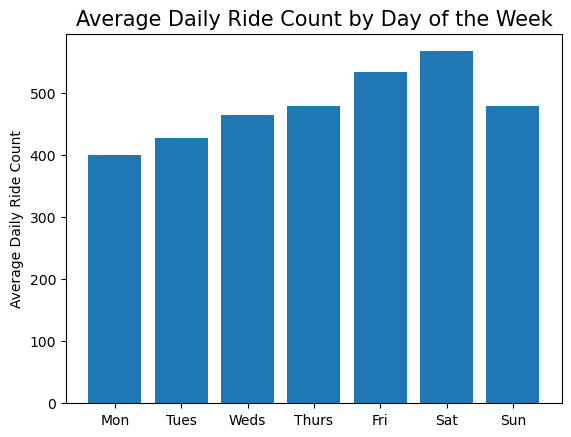

<Figure size 400x350 with 0 Axes>

In [50]:
dow_sort = rides_df.sort_values("DOW")
dow_ride_count = dow_sort.groupby(["DOW"])["MYDATE"].count()
dow_count = dow_sort.groupby(["DOW"])["MYDATE"].nunique()
dow_ave = dow_ride_count / dow_count
x_axis = dow_sort["DOW"].unique()
tick_labels = dow_sort["PICKUP_DAY"].unique()
tick_locations = [value for value in x_axis]
y_values = dow_ave
plt.bar(x_axis, y_values)
plt.xticks(tick_locations, tick_labels)
plt.title("Average Daily Ride Count by Day of the Week", fontsize=15)
plt.ylabel("Average Daily Ride Count")
plt.figure(figsize=(4, 3.5))
plt.show()

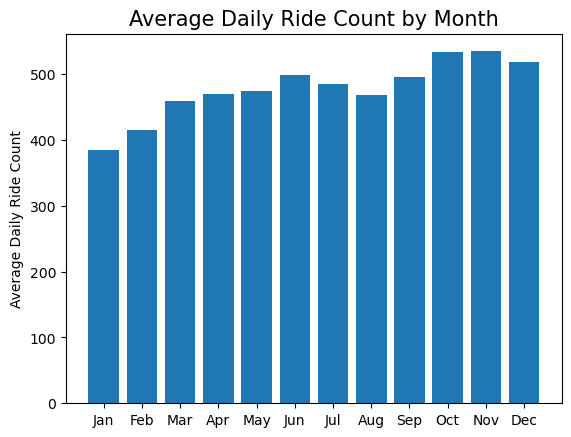

<Figure size 400x350 with 0 Axes>

In [33]:
# Ride Count per Month (ave)
rides_df["MONTH"] = rides_df["MYDATE"].dt.month
rides_df = rides_df.sort_values("MYDATE")
days_per_month = rides_df.groupby(["MONTH"])["MYDATE"].nunique()
rides_per_month = rides_df.groupby(["MONTH"])["MYDATE"].count()
ave_rides = rides_per_month / days_per_month
x_values = rides_df["MONTH"].unique()
y_values = ave_rides
tick_locations = [value for value in x_values]
months = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
plt.xticks(tick_locations, months)
plt.bar(x_values, y_values)
plt.ylabel("Average Daily Ride Count")
plt.title("Average Daily Ride Count by Month", fontsize=15)
plt.figure(figsize=(4, 3.5))
plt.show()

r-value: 0.29917711096501626


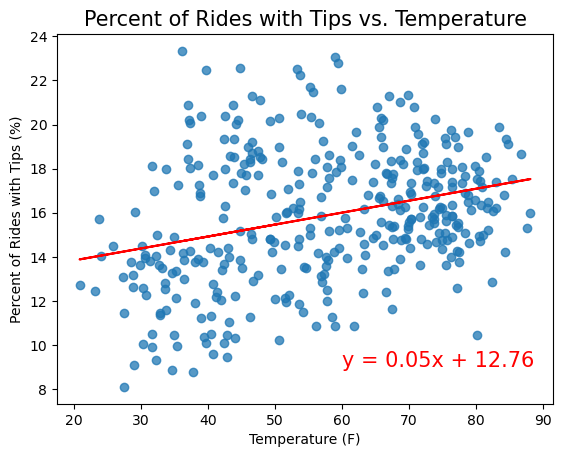

<Figure size 400x350 with 0 Axes>

In [36]:
# Percent of rides w/ tips vs. weather conditions
daily_temp = rides_df.groupby(["MYDATE"])["TEMP_F"].unique()
ride_count = rides_df.groupby(["MYDATE"])["PICKUP_DAY"].count()
tipcount = rides_df.loc[rides_df["P_TIP"] > 0]
tips = tipcount.groupby(["MYDATE"])["PICKUP_DAY"].count()
percent_tipped = (tips / ride_count) * 100
x_values = daily_temp.astype(float)
y_values = percent_tipped.astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values, alpha=0.75)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq, (60, 9), fontsize=15, color="red")
plt.xlabel("Temperature (F)")
plt.ylabel("Percent of Rides with Tips (%)")
plt.title("Percent of Rides with Tips vs. Temperature", fontsize=15)
print(f"r-value: {rvalue}")
plt.figure(figsize=(4, 3.5))
plt.show()

r-value: 0.34440626093696786


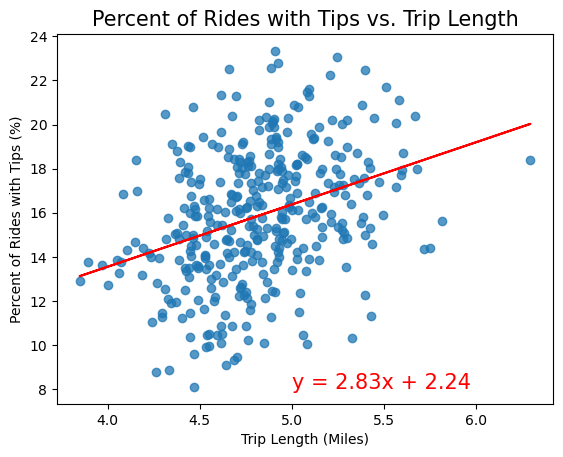

<Figure size 400x350 with 0 Axes>

In [38]:
# Percent of rides w/ tips vs. ride length (miles)
ave_miles = rides_df.groupby(["MYDATE"])["TRIP_MILES"].mean()
ride_count = rides_df.groupby(["MYDATE"])["PICKUP_DAY"].count()
tipcount = rides_df.loc[rides_df["P_TIP"] > 0]
tips = tipcount.groupby(["MYDATE"])["PICKUP_DAY"].count()
percent_tipped = (tips / ride_count) * 100
x_values = ave_miles.astype(float)
y_values = percent_tipped.astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values, alpha=0.75)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq, (5, 8), fontsize=15, color="red")
plt.xlabel("Trip Length (Miles)")
plt.ylabel("Percent of Rides with Tips (%)")
plt.title("Percent of Rides with Tips vs. Trip Length", fontsize=15)
print(f"r-value: {rvalue}")
plt.figure(figsize=(4, 3.5))
plt.show()